In [13]:
#Assignment 3 : logistic regression

In [14]:
import pandas as pd

# load dataset
pima = pd.read_csv("diabetes.csv")
pima.columns = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']


**Loading Data**

In [15]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Selecting Features**

In [16]:
#split dataset into features and target variables

feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X = pima[feature_cols]  # Features
y = pima.label # Target variable

**Splitting Data**

In [17]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 16)

**Model Development and Prediction**

In [18]:
# import the class 
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state = 16)

# fit the model with data
logreg.fit (X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\abhis\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Model Evaluation using Confusion Matrix**

In [19]:
# import the matrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

**Visualizing confusion matrix using a heatmap**


([<matplotlib.axis.YTick at 0x1e2f9ee0080>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

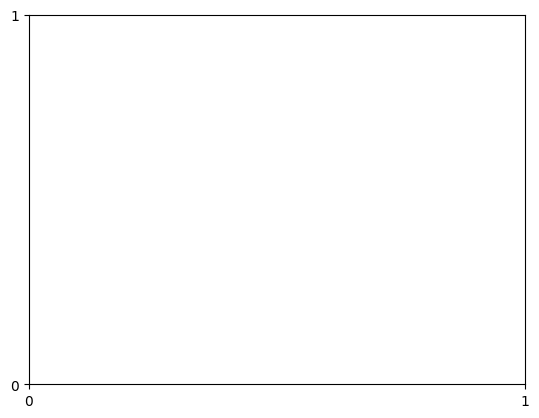

In [27]:
# import required Modules 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class_name = [0,1] #name of the classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name)
plt.yticks(tick_marks, class_name)


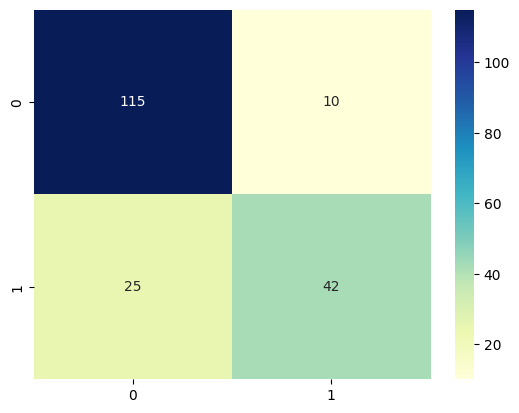

In [28]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")

Text(0.5, 0, 'Predicted label')

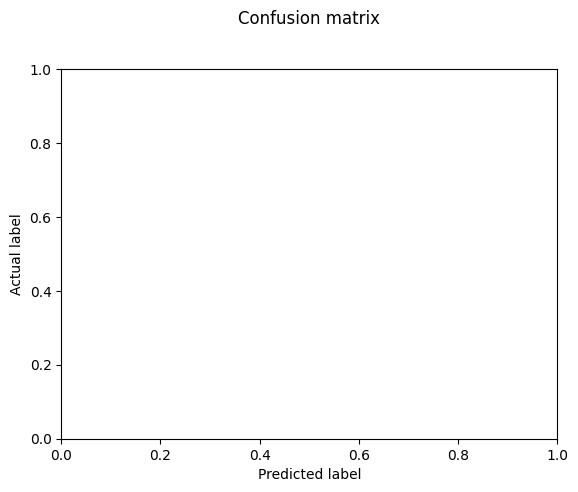

In [30]:
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")


**Confusion Matrix Evaluation Metrices**

In [31]:
from sklearn.metrics import classification_report
target_names = ["without diabetes","with diabetes"]
print(classification_report(y_test, y_pred, target_names = target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



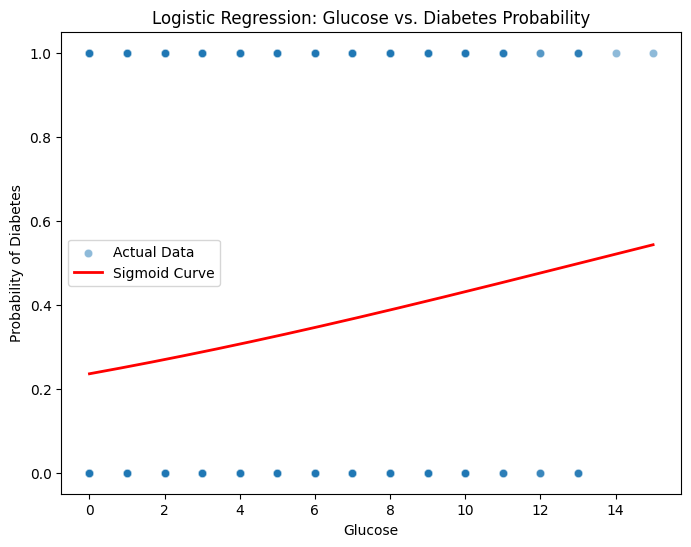

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'logreg', 'X_train', and 'y_train' are already defined
# and that X_train is a pandas DataFrame with column names.

# --- FIX STARTS HERE ---

# 1. Identify the name of your glucose column (likely the first one)
#    and the names of the other feature columns.
glucose_col_name = X_train.columns[0] 
other_col_names = X_train.columns[1:]

# 2. Create a range of values for Glucose
glucose_range = np.linspace(X_train[glucose_col_name].min(), X_train[glucose_col_name].max(), 200)

# 3. Create a new DataFrame for plotting. Start with the mean of all features.
plot_features = pd.DataFrame([X_train.mean().values] * 200, columns=X_train.columns)

# 4. Overwrite the 'Glucose' column with your range of values.
plot_features[glucose_col_name] = glucose_range

# 5. Use this new 7-feature DataFrame to predict probabilities.
probabilities = logreg.predict_proba(plot_features)[:, 1]

# --- FIX ENDS HERE ---


# Prepare training data for scatterplot (using only the actual Glucose values for the dots)
plot_data = pd.DataFrame({
    'Glucose': X_train[glucose_col_name],
    'Outcome': y_train
})


# Prepare sigmoid curve data
plot_df = pd.DataFrame({
    'Glucose': glucose_range, # The varying glucose values
    'probability': probabilities # The corresponding predicted probabilities
})

# Plot
plt.figure(figsize=(8, 6))
# The scatter plot uses the original, actual training data
sns.scatterplot(x='Glucose', y='Outcome', data=plot_data, alpha=0.5, label='Actual Data')
# The line plot uses the newly generated probabilities
sns.lineplot(x='Glucose', y='probability', data=plot_df, color='red', linewidth=2, label='Sigmoid Curve')

plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression: Glucose vs. Diabetes Probability')
plt.legend()
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8177083333333334

Confusion Matrix:
 [[115  10]
 [ 25  42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       125
           1       0.81      0.63      0.71        67

    accuracy                           0.82       192
   macro avg       0.81      0.77      0.79       192
weighted avg       0.82      0.82      0.81       192



C:\Users\abhis\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
